# Breast Cancer Detection

## Introduction


Breast cancer is one of the most common cancers among women worldwide. The early diagnosis of Breast Cancer can improve the prediction and chance of survival significantly, as it can promote timely clinical treatment to patients. 

There are two main classifications of tumors. One is known as benign and the other as malignant. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

## Objective

Predict whether a tumor is benign or malignant based on the diagnosed features.

## Code

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop(columns=['Unnamed: 32'], inplace=True)

<AxesSubplot:>

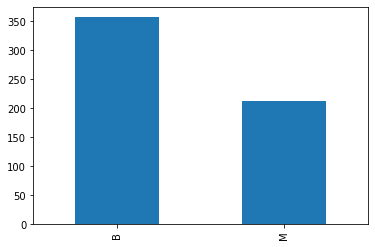

In [8]:
data.diagnosis.value_counts().plot(kind='bar')

In [9]:
malignant = data[data.diagnosis == 'M']
benign = data[data.diagnosis == 'B']

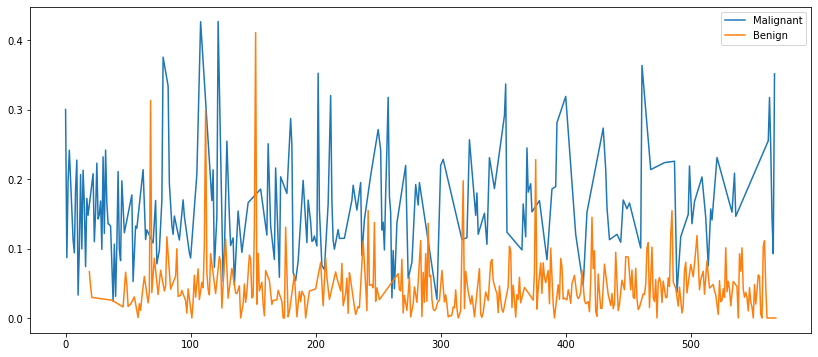

In [10]:
_, _ = plt.subplots(figsize=(14, 6))
plt.plot(malignant.concavity_mean, label = 'Malignant')
plt.plot(benign.concavity_mean, label = 'Benign')
plt.legend();

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
features = data.drop(columns=['diagnosis'])
labels = data.diagnosis

In [13]:
features.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)

In [15]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, shuffle=True, random_state = 100)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [18]:
def create_model():
    model = Sequential([Input(shape=(31,)),
                        Dense(32, activation='relu'),
                        Dense(16, activation='relu'),
                        Dropout(0.5),
                        Dense(1, activation='sigmoid')])
    return model

In [19]:
model = create_model()

In [20]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.0001))

In [21]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, verbose=1, batch_size=8)

Epoch 1/50
58/58 [==============================] - 0s 6ms/step - loss: 0.7682 - accuracy: 0.4717 - val_loss: 0.6506 - val_accuracy: 0.5192
Epoch 2/50
58/58 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.5348 - val_loss: 0.6043 - val_accuracy: 0.6346
Epoch 3/50
58/58 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.5761 - val_loss: 0.5639 - val_accuracy: 0.6923
Epoch 4/50
58/58 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6283 - val_loss: 0.5320 - val_accuracy: 0.7500
Epoch 5/50
58/58 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.7000 - val_loss: 0.5029 - val_accuracy: 0.7885
Epoch 6/50
58/58 [==============================] - 0s 4ms/step - loss: 0.5561 - accuracy: 0.7022 - val_loss: 0.4755 - val_accuracy: 0.8462
Epoch 7/50
58/58 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7500 - val_loss: 0.4521 - val_accuracy: 0.9038
Epoch 8/50
58/58 [==

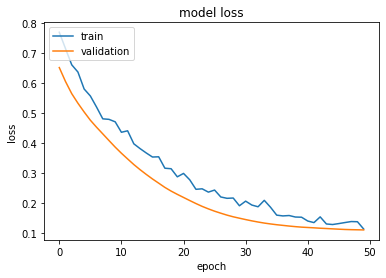

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred = (y_pred >= 0.5).astype(int)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.86      0.93        22

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57

